# Explore here



In [3]:
#Step 1: Install dependencies

import requests
import time
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

#Step 2: Download HTML

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)


#Step 3: Transform the HTML

hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(url, headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'html.parser')


#Find all tables

tables = soup.find_all("table", class_ = "historical_data_table table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [14]:
import pandas as pd

for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_quaterly = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_quaterly = pd.concat([tesla_quaterly, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_quaterly.head(11)

,Date,Revenue
0,2023-12-31,25167
1,2023-09-30,23350
2,2023-06-30,24927
3,2023-03-31,23329
4,2022-12-31,24318
5,2022-09-30,21454
6,2022-06-30,16934
7,2022-03-31,18756
8,2021-12-31,17719
9,2021-09-30,13757


In [33]:
import sqlite3

connection = sqlite3.connect("tesla_revenue.db")

cursor = connection.cursor()


In [34]:
cursor.execute("""CREATE TABLE TESLA
               (DATE    TEXT,
               REVENUE  INT)""")

In [42]:
#Add dataframe data to SQLite database

tesla_quaterly.to_sql('TESLA', connection, if_exists='append', index=False)
connection.commit()

In [43]:
cursor.execute("SELECT * FROM TESLA")
rows = cursor.fetchall()
for row in rows:
    print(row)



('2023-12-31', 25167)
('2023-09-30', 23350)
('2023-06-30', 24927)
('2023-03-31', 23329)
('2022-12-31', 24318)
('2022-09-30', 21454)
('2022-06-30', 16934)
('2022-03-31', 18756)
('2021-12-31', 17719)
('2021-09-30', 13757)
('2021-06-30', 11958)
('2021-03-31', 10389)
('2020-12-31', 10744)
('2020-09-30', 8771)
('2020-06-30', 6036)
('2020-03-31', 5985)
('2019-12-31', 7384)
('2019-09-30', 6303)
('2019-06-30', 6350)
('2019-03-31', 4541)
('2018-12-31', 7226)
('2018-09-30', 6824)
('2018-06-30', 4002)
('2018-03-31', 3409)
('2017-12-31', 3288)
('2017-09-30', 2985)
('2017-06-30', 2790)
('2017-03-31', 2696)
('2016-12-31', 2285)
('2016-09-30', 2298)
('2016-06-30', 1270)
('2016-03-31', 1147)
('2015-12-31', 1214)
('2015-09-30', 937)
('2015-06-30', 955)
('2015-03-31', 940)
('2014-12-31', 957)
('2014-09-30', 852)
('2014-06-30', 769)
('2014-03-31', 621)
('2013-12-31', 615)
('2013-09-30', 431)
('2013-06-30', 405)
('2013-03-31', 562)
('2012-12-31', 306)
('2012-09-30', 50)
('2012-06-30', 27)
('2012-03-31', 3

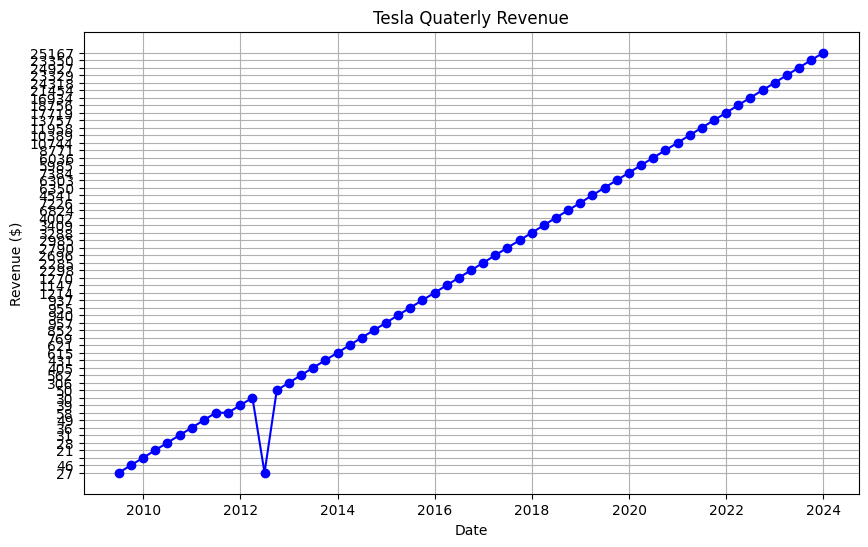

In [57]:
import matplotlib.pyplot as plt


tesla_quaterly['Date'] = pd.to_datetime(tesla_quaterly['Date'])
tesla_quaterly = tesla_quaterly.sort_values(by='Date')

plt.figure(figsize=(10, 6))
plt.plot(tesla_quaterly['Date'], tesla_quaterly['Revenue'], marker='o', color='b')
plt.title('Tesla Quaterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()


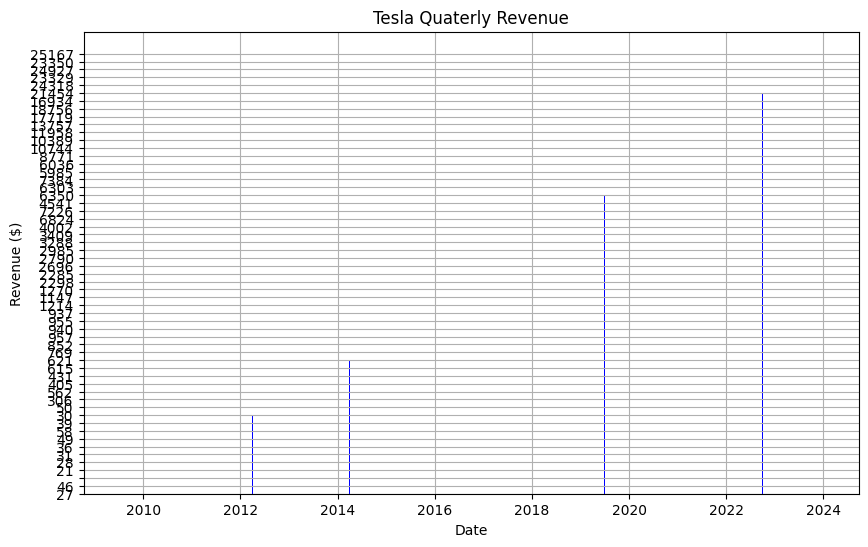

In [62]:
import seaborn as sns

tesla_quaterly['Date'] = pd.to_datetime(tesla_quaterly['Date'])
tesla_quaterly = tesla_quaterly.sort_values(by='Date')

plt.figure(figsize=(10, 6))
plt.bar(tesla_quaterly['Date'], tesla_quaterly['Revenue'], color='b')
plt.title('Tesla Quaterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

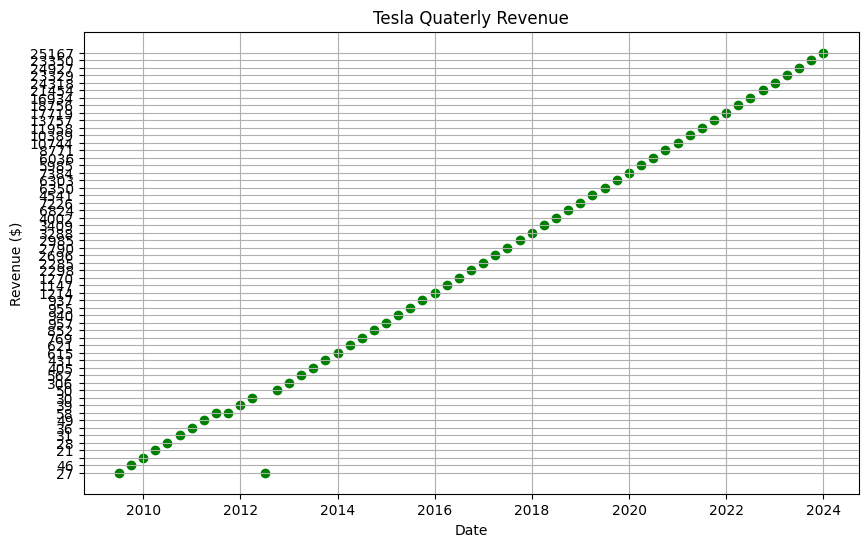

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(tesla_quaterly['Date'], tesla_quaterly['Revenue'], color='g', marker='o')
plt.title('Tesla Quaterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()